In [15]:

import pandas as pd
from feature_extractor import fingerprint_features
import numpy as np
import seaborn as sns

In [2]:
DATASET_SINGLE_PATH = './data/dataset_single.csv'
df = pd.read_csv(DATASET_SINGLE_PATH)
df.head()

,P1,mol_id,smiles
0,1,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,1,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,0,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,1,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P1      4999 non-null   int64 
 1   mol_id  4999 non-null   object
 2   smiles  4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


c:\Users\ayman\miniconda3\envs\servier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

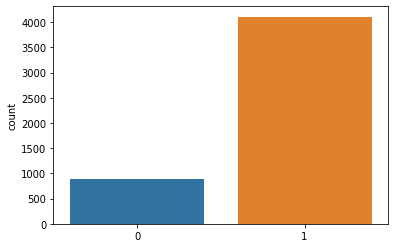

In [4]:
sns.countplot(df['P1'].values)

In [5]:
fingerprints = df['smiles'].apply(lambda x: (np.frombuffer(fingerprint_features(x).ToBitString().encode(), 'u1') - ord('0')))
# X.head()
X = pd.DataFrame(fingerprints.to_list(), columns=[f'Bit_{i}' for i in range(fingerprints[0].shape[0])])
X.shape
# fingerprints[0].shape[0]

(4999, 2048)

In [6]:
input_size = X.shape[1]

In [7]:
Y = df['P1']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: P1, dtype: int64